# Imports

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# To ensure tabular data shows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Dataset Preprocessing

In [2]:
def combine_csv_files(folder_path):
    """
    Combina todos los archivos CSV de una carpeta en un único DataFrame.

    Args:
    folder_path (str): Ruta de la carpeta que contiene los archivos CSV.

    Returns:
    pandas.DataFrame: DataFrame que contiene todos los datos combinados.
    """

    # Lista para guardar los dataframes individuales
    all_dataframes = []

    # Itera sobre cada archivo en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            all_dataframes.append(df)

    # Combina todos los dataframes en uno solo
    combined_dataframe = pd.concat(all_dataframes, ignore_index=True)
    
    return combined_dataframe

df = combine_csv_files('dataset/CICIoT2023')
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.037456,15099.00,17.0,64.0,10001.102371,10001.102371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.0,50.000000,0.000000,50.0,8.310215e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1,0.000000,54.00,6.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.333177e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
2,0.010346,9662.50,17.0,64.0,21380.056228,21380.056228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.0,50.0,50.0,50.000000,0.000000,50.0,8.309879e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
3,0.000000,54.00,6.0,64.0,241.333973,241.333973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.295112e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
4,0.195109,95.58,6.0,64.0,6.762174,6.762174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.336540e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46686574,0.000000,54.00,6.0,64.0,12.305208,12.305208,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.334406e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
46686575,0.260599,195.28,17.0,64.0,5.019235,5.019235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,975.0,86.1,101.5,93.980208,6.256217,91.6,8.300770e+07,9.5,13.225017,8.802365,287.083940,0.14,141.55,DoS-UDP_Flood
46686576,59.963741,67179.40,12.0,102.8,5.632240,5.632240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,226.5,463.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1761.7,54.0,275.5,110.883388,66.941103,160.3,1.665198e+08,13.5,14.871934,94.837019,4892.474222,1.00,244.60,BenignTraffic
46686577,0.537183,85.86,6.0,64.0,2.198275,2.198275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.0,54.0,54.0,54.000000,0.000000,54.0,8.336535e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood


# Exploratory data analysis

In [3]:
# Dataset shape
df.shape

(46686579, 47)

In [4]:
# Dataset columns
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'], dtype='object')

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP       

In [6]:
# Dataset description
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07,4.668658e+07
mean,5.765449e+00,7.670596e+04,9.065690e+00,6.635072e+01,9.064057e+03,9.064057e+03,5.463949e-06,8.657207e-02,2.073353e-01,9.050473e-02,8.775006e-02,1.234317e-01,1.477941e-06,7.282607e-07,9.054283e-02,3.303579e-01,9.907672e-02,6.239824e+00,3.846812e+01,4.823423e-02,5.509922e-02,1.306800e-04,2.141943e-08,6.425830e-08,4.093253e-05,1.499360e-07,5.738343e-01,2.119176e-01,1.713555e-06,6.618604e-05,1.637216e-01,9.998873e-01,9.998873e-01,1.308323e+03,9.160735e+01,1.819634e+02,1.246688e+02,3.332481e+01,1.246916e+02,8.318253e+07,9.498489e+00,1.312182e+01,4.709498e+01,3.072436e+04,9.643760e-02,1.415124e+02
std,2.850342e+02,4.613317e+05,8.945533e+00,1.401919e+01,9.956249e+04,9.956249e+04,7.250766e-03,2.812070e-01,4.053978e-01,2.869035e-01,2.829311e-01,3.289321e-01,1.215705e-03,8.533816e-04,2.864314e-01,6.635354e-01,3.271164e-01,7.185245e+01,3.253847e+02,2.142608e-01,2.281738e-01,1.143079e-02,1.463538e-04,2.534922e-04,6.397723e-03,3.872157e-04,4.945185e-01,4.086668e-01,1.309027e-03,8.135211e-03,3.700227e-01,1.061485e-02,1.061485e-02,2.613303e+03,1.396953e+02,5.240309e+02,2.409915e+02,1.603357e+02,2.415493e+02,1.704735e+07,8.191532e-01,8.628579e+00,2.267696e+02,3.237107e+05,2.330010e-01,2.106831e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091856e+00,2.091856e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.250000e+02,5.000000e+01,5.000000e+01,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.575423e+01,1.575423e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.670000e+02,5.400000e+01,5.400000e+01,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75

In [7]:
# Distribution of attack labels
df['label'].value_counts()

DDoS-ICMP_Flood            7200504
DDoS-UDP_Flood             5412287
DDoS-TCP_Flood             4497667
DDoS-PSHACK_Flood          4094755
DDoS-SYN_Flood             4059190
DDoS-RSTFINFlood           4045285
DDoS-SynonymousIP_Flood    3598138
DoS-UDP_Flood              3318595
DoS-TCP_Flood              2671445
DoS-SYN_Flood              2028834
BenignTraffic              1098195
Mirai-greeth_flood          991866
Mirai-udpplain              890576
Mirai-greip_flood           751682
DDoS-ICMP_Fragmentation     452489
MITM-ArpSpoofing            307593
DDoS-UDP_Fragmentation      286925
DDoS-ACK_Fragmentation      285104
DNS_Spoofing                178911
Recon-HostDiscovery         134378
Recon-OSScan                 98259
Recon-PortScan               82284
DoS-HTTP_Flood               71864
VulnerabilityScan            37382
DDoS-HTTP_Flood              28790
DDoS-SlowLoris               23426
DictionaryBruteForce         13064
BrowserHijacking              5859
CommandInjection    

In [8]:
# Show only non numerical columns names
df.select_dtypes(exclude='number').columns

Index(['label'], dtype='object')

In [9]:
# Sum of null values
df.isnull().sum().sum()

0

In [10]:
# Maps 34 labels into 8 simpler labels. 
remap_labels = {
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Recon-PingSweep': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'VulnerabilityScan': 'Recon',
    'Recon-HostDiscovery': 'Recon',
    'DNS_Spoofing': 'Spoofing',
    'MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign',
    'BrowserHijacking': 'Web',
    'Backdoor_Malware': 'Web',
    'XSS': 'Web',
    'Uploading_Attack': 'Web',
    'SqlInjection': 'Web',
    'CommandInjection': 'Web',
    'DictionaryBruteForce': 'BruteForce'
}

# aca se rompe por que el nombre es otro
df['label'] = df['label'].map(remap_labels)

In [12]:
df['label']

0             DDoS
1             DDoS
2             DDoS
3              DoS
4             DDoS
             ...  
46686574      DDoS
46686575       DoS
46686576    Benign
46686577      DDoS
46686578      DDoS
Name: label, Length: 46686579, dtype: object

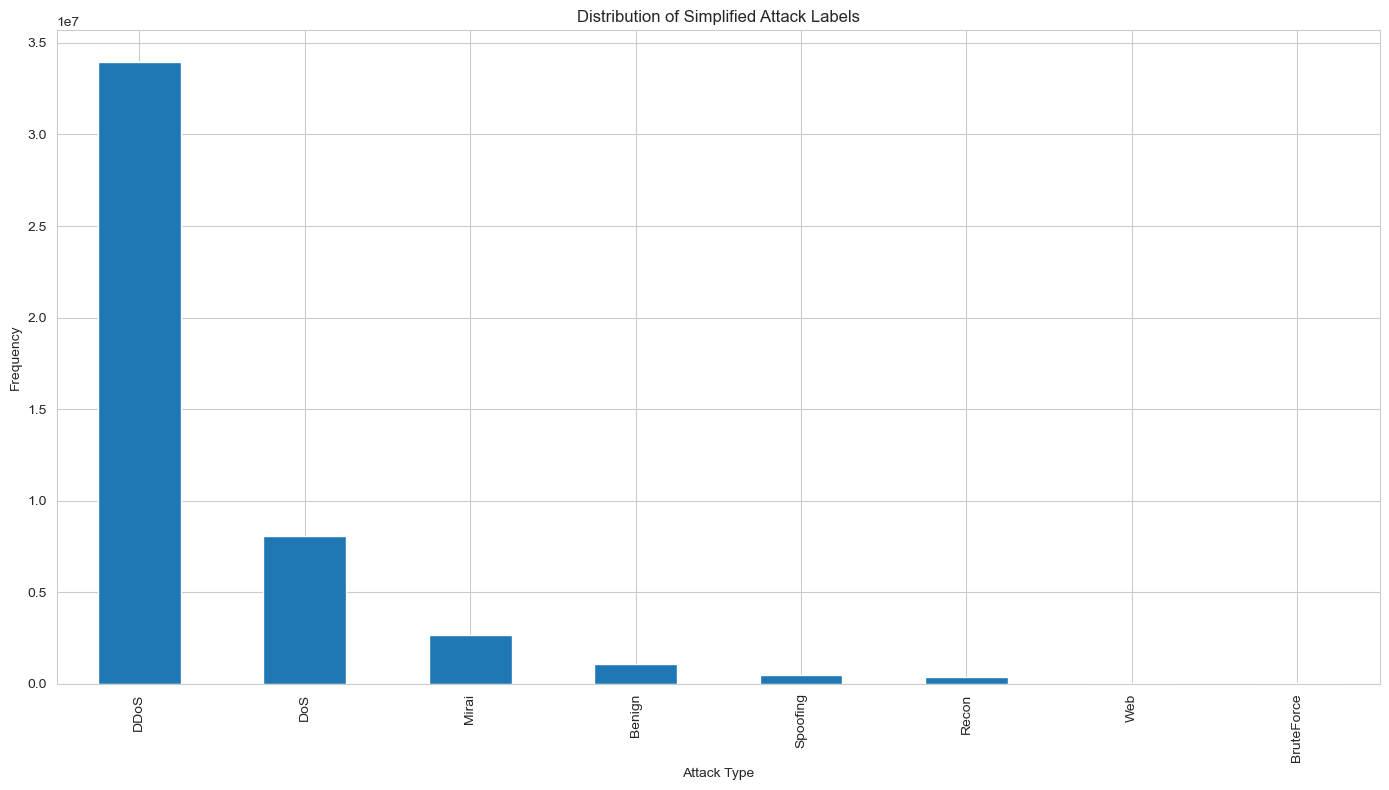

In [13]:
#cuenta la frecuencia de cada etiqueta simplificada
label_counts = df['label'].value_counts()

# estilo
sns.set_style("whitegrid")

#crea el gráfico de barras para la distribución de etiquetas de ataques
plt.figure(figsize=(14, 8))
label_counts.plot(kind='bar')
plt.title('Distribution of Simplified Attack Labels')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.tight_layout()  

plt.show()

In [14]:
# Use one hot encoding to transform categorical columns to numerical 
df = pd.get_dummies(df, columns=['label'], prefix='', prefix_sep='')

In [15]:
# Correlation matrix
corr = df.corr(numeric_only=True)

In [16]:
corr[['Benign', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web']]

,Benign,BruteForce,DDoS,DoS,Mirai,Recon,Spoofing,Web
flow_duration,0.018318,0.040046,-0.030441,-0.006187,-0.003791,0.077016,0.060359,0.021783
Header_Length,0.313841,-0.001013,-0.247317,-0.066808,0.237367,0.004541,0.319424,0.008779
Protocol Type,-0.027288,-0.002034,-0.429170,0.069155,0.737149,-0.014687,0.002047,-0.001393
Duration,0.538323,0.031946,-0.240137,-0.030764,-0.019623,0.189069,0.229133,0.053634
Rate,-0.011089,-0.001295,0.000125,0.009562,-0.002670,-0.006521,-0.007394,-0.001715
Srate,-0.011089,-0.001295,0.000125,0.009562,-0.002670,-0.006521,-0.007394,-0.001715
Drate,-0.000117,-0.000013,0.000461,-0.000345,-0.000184,-0.000066,-0.000077,-0.000017
fin_flag_number,-0.047779,-0.005050,0.188072,-0.140870,-0.075281,-0.026654,-0.031544,-0.007102
syn_flag_number,-0.079364,-0.008462,0.070516,0.042761,-0.125062,-0.010981,-0.052347,-0.011791
rst_flag_number,-0.048934,-0.005273,0.176117,-0.132032,-0.077133,0.003905,-0.032213,-0.007273


In [17]:
# Esto que funcion tiene?
corr[['Benign', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web']].describe()

,Benign,BruteForce,DDoS,DoS,Mirai,Recon,Spoofing,Web
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.115481,0.029992,-0.070405,-0.031182,0.055065,0.036164,0.085741,0.025130
std,0.227688,0.144547,0.238499,0.185326,0.250310,0.146089,0.180567,0.136296
min,-0.253873,-0.027366,-0.748908,-0.748908,-0.399979,-0.143091,-0.167852,-0.037731
25%,-0.012955,-0.001955,-0.201990,-0.088701,-0.050198,-0.008363,-0.007394,-0.002280
50%,-0.000117,-0.000005,-0.014218,-0.019183,-0.002670,0.001233,0.001647,-0.000007
75%,0.300327,0.010750,0.000671,-0.000079,0.000864,0.037789,0.197312,0.015506
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


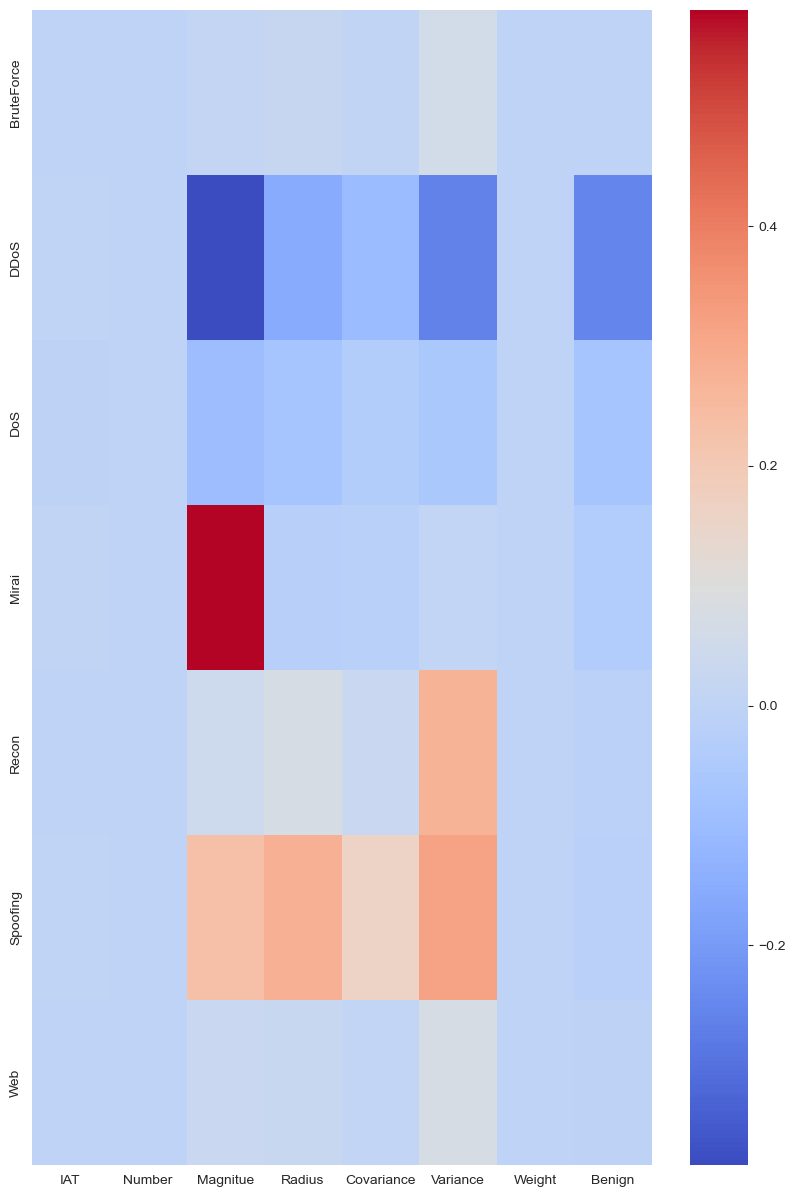

In [18]:
# ESto es la correlacion entre labels, no? De que nos serviria? No deberiamos hacer la correlacion de labels con columnas?
plt.subplots(figsize=(10,15))
heat = sns.heatmap(corr.iloc[47:,39:47], cmap = 'coolwarm')

Min-Max Scaling: Escala los valores para que caigan dentro de un rango definido  0 y 1). La fórmula es: 
$$\frac{x - \min(x)}{\max(x) - \min(x)}$$ 

Ajusta los valores numéricos en el conjunto de datos a una escala común sin distorsionar las diferencias en los rangos de valores.

In [19]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [20]:
df_scaled.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Benign,BruteForce,DDoS,DoS,Mirai,Recon,Spoofing,Web
0,9.497952e-08,0.001524,0.361702,0.25098,1.192224e-03,1.192224e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.003794,0.000591,0.000163,0.000591,0.0,0.000591,0.495720,0.607143,0.005363,0.0,0.0,0.0,0.57697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000005,0.127660,0.25098,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000227,0.000104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.004124,0.000886,0.000245,0.000886,0.0,0.000886,0.497089,0.607143,0.007884,0.0,0.0,0.0,0.57697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.623440e-08,0.000975,0.361702,0.25098,2.548701e-03,2.548701e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.003794,0.000591,0.000163,0.000591,0.0,0.000591,0.495700,0.607143,0.005363,0.0,0.0,0.0,0.57697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000e+00,0.000005,0.127660,0.25098,2.876925e-05,2.876925e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.004124,0.000886,0.000245,0.000886,0.0,0.000886,0.494819,0.607143,0.007884,0.0,0.0,0.0,0.57697,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.947524e-07,0.000010,0.127660,0.25098,8.061140e-07,8.061140e-07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137529,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.004124,0.000886,0.000245,0.000886,0.0,0.000886,0.497290,0.607143,0.007884,0.0,0.0,0.0,0.57697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
